##### >
> # MaaSSim tutorial

 ### parallel simulations

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import os, sys # add MaaSSim to path (not needed if MaaSSim is already in path)
import seaborn as sns
import matplotlib.pyplot as plt
from dotmap import DotMap
module_path = os.path.abspath(os.path.join('../..'))
if module_path not in sys.path:
    sys.path.append(module_path)

prepare

In [4]:
from MaaSSim.utils import get_config, load_G, prep_supply_and_demand, collect_results  # simulator
from MaaSSim.data_structures import structures as inData
from MaaSSim.simulators import simulate, simulate_parallel
from MaaSSim.traveller import travellerEvent
from MaaSSim.driver import driverEvent

In [5]:
params = get_config('../../data/config/delft.json')  # load configuration

In [6]:
params.paths.dumps = 'sd'
params.times.patience = 1200
params.simTime = 4
params.parallel.nThread = 4
params.parallel.nReplications = 10

In [7]:
inData = load_G(inData, params)  # load network graph 

In [8]:
space = DotMap()
space.nP = list(range(50,1001,50))
space.nV = list(range(20,201,20))
dict(space)

{'nP': [50,
  100,
  150,
  200,
  250,
  300,
  350,
  400,
  450,
  500,
  550,
  600,
  650,
  700,
  750,
  800,
  850,
  900,
  950,
  1000],
 'nV': [20, 40, 60, 80, 100, 120, 140, 160, 180, 200]}

simulate

In [8]:
# simulate_parallel(params = params, search_space = space)

### collect

demand structure

In [9]:
res = collect_results(params.paths.dumps)

In [10]:
veh_kpis = res.veh_kpi
veh_kpis = veh_kpis[veh_kpis['Unnamed: 0']== 'mean']
veh_kpis['demand'] = veh_kpis.nP.astype(int)
veh_kpis['supply'] = veh_kpis.nV.astype(int)
veh_kpis['y'] = veh_kpis.IS_ACCEPTED_BY_TRAVELLER

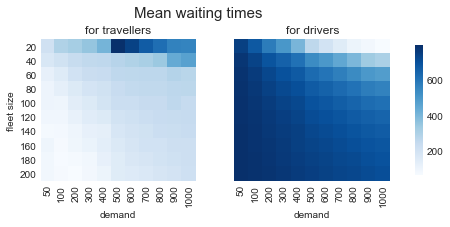

In [23]:
plt.rcParams["font.family"] = "Times"
plt.style.use('seaborn-whitegrid')
font = {'size'   : 10}

plt.rc('font', **font)
fig, axes = plt.subplots(1,2, figsize = (6,3), sharey = True, sharex = True)
axes = axes.flatten()
veh_kpis = res.veh_kpi
veh_kpis = veh_kpis[veh_kpis['Unnamed: 0']== 'mean']
veh_kpis['demand'] = veh_kpis.nP.astype(int) // 100 * 100
veh_kpis['demand'] = veh_kpis.demand.apply(lambda x: 50 if x == 0 else x)
veh_kpis['fleet size'] = veh_kpis.nV.astype(int) 
veh_kpis['y'] = 800-veh_kpis.IS_ACCEPTED_BY_TRAVELLER
veh_kpis = veh_kpis.groupby(['fleet size','demand'])['y'].mean().unstack()
#veh_kpis= veh_kpis.pivot(index = 'supply', columns = 'demand', values = 'y')
cbar_ax = fig.add_axes([1.0, .2, .02, .6])
sns.heatmap(veh_kpis, cmap="Blues", ax = axes[1], square = True, cbar = True, cbar_ax = cbar_ax)
pax_kpi = res.pax_kpi
pax_kpi = pax_kpi[pax_kpi['Unnamed: 0']== 'mean']
pax_kpi['demand'] = pax_kpi.nP.astype(int) // 100 * 100
pax_kpi['demand'] = pax_kpi.demand.apply(lambda x: 50 if x == 0 else x)
pax_kpi['fleet size'] = pax_kpi.nV.astype(int) 
pax_kpi['y'] = pax_kpi.LOSES_PATIENCE/10+pax_kpi.MEETS_DRIVER_AT_PICKUP
pax_kpi = pax_kpi.groupby(['fleet size','demand'])['y'].mean().unstack()
#pax_kpi= pax_kpi.pivot(index = 'supply', columns = 'demand', values = 'y')

sns.heatmap(pax_kpi, cmap="Blues", ax = axes[0], square = True, cbar = False)
pax_kpi.round(-1).astype(int)
plt.suptitle('Mean waiting times',  fontsize = 15)
axes[1].set_title('for drivers')
axes[1].set_ylabel('')
axes[0].set_title('for travellers')
plt.tight_layout()
plt.savefig('e2.png')

In [15]:
veh_kpis = res.veh_kpi
veh_kpis = veh_kpis[veh_kpis['Unnamed: 0']== 'mean']
veh_kpis

,Unnamed: 0,nRIDES,nREJECTED,OUT,STARTS_DAY,OPENS_APP,RECEIVES_REQUEST,ACCEPTS_REQUEST,REJECTS_REQUEST,IS_ACCEPTED_BY_TRAVELLER,...,DEPARTS_FROM_PICKUP,ARRIVES_AT_DROPOFF,CONTINUES_SHIFT,STARTS_REPOSITIONING,REPOSITIONED,DECIDES_NOT_TO_DRIVE,ENDS_SHIFT,nV,nP,dt
1,mean,2.475000,0.0,0.0,0.0,0.0,8440.950000,37.5000,0.0,39.275000,...,75.000,703.733333,0.0,0.0,0.0,0.0,12036.033333,120,300,20201008155902976236
1,mean,6.250000,0.0,0.0,0.0,0.0,7889.275000,93.7500,0.0,113.306250,...,187.500,1801.306250,0.0,0.0,0.0,0.0,11103.968750,160,1000,20201008191555642321
1,mean,4.000000,0.0,0.0,0.0,0.0,7773.080000,60.0000,0.0,71.320000,...,120.000,1249.040000,0.0,0.0,0.0,0.0,12092.810000,100,400,20201008164059740792
1,mean,6.990000,0.0,0.0,0.0,0.0,8155.290000,105.0000,0.0,128.550000,...,210.000,2093.180000,0.0,0.0,0.0,0.0,10296.660000,100,700,20201008172543828372
1,mean,9.166667,0.0,0.0,0.0,0.0,8688.400000,137.5000,0.0,174.900000,...,275.000,2622.550000,0.0,0.0,0.0,0.0,8953.850000,60,550,20201008162247048768
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1,mean,16.633333,0.0,0.0,0.0,0.0,6669.116667,250.0000,0.0,312.133333,...,500.000,4690.350000,0.0,0.0,0.0,0.0,7361.366667,60,1000,20201008184033104098
1,mean,33.700000,0.0,0.0,0.0,0.0,515.950000,52.2000,0.0,658.000000,...,1011.000,9223.700000,0.0,0.0,0.0,0.0,6268.800000,20,750,20201008170658390655
1,mean,3.750000,0.0,0.0,0.0,0.0,8670.150000,56.2500,0.0,70.300000,...,112.500,1225.925000,0.0,0.0,0.0,0.0,11164.600000,40,150,20201008143657325715
1,mean,7.000000,0.0,0.0,0.0,0.0,8960.290000,105.0000,0.0,127.740000,...,210.000,1942.720000,0.0,0.0,0.0,0.0,9821.770000,100,700,20201008172704291448


-------------
Rafal Kucharski, 2020, Delft, r.m.kucharski@tudelft.nl